<a href="https://colab.research.google.com/github/Ale2497/Tercer-proyecto-Cosmologia-2023/blob/main/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

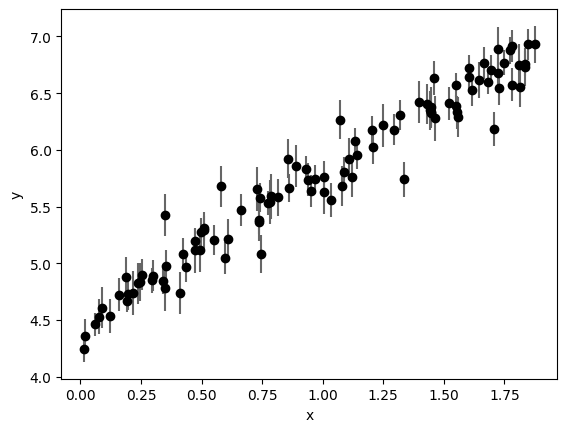

In [3]:
n = 100 #number of data points
m = 1.255 
b = 4.5

x= np.random.uniform(0,2,n) #(low,high,size)
x.sort()#sort the values in place

#evaluar el modelo 
y= m*x + b

#incertidumbre guassiana
y_err = np.random.uniform(0.1,0.2,size = n) #incert generada aleatoriamente
y = np.random.normal(y,y_err)#re organizando los datos 

datastyle = dict(linestyle ='none',marker='o',color='k',ecolor = '#666666')
plt.errorbar(x,y,y_err,**datastyle)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
 #we define the funtion to evaluate a straight line model at values x 
 #the pars variable contains the values of parameters m and b of the line

 

def LineaRecta(pars,x):
  return pars[0]*np.array(x) + pars[1]

In [5]:
class Modelo(object):
    
    def __init__(self, x, y, y_err):
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.y_err = np.asarray(y_err)

    def ln_likelihood(self, pars):
        N = len(self.y)
        
        #dy es la diferencia entre entre los datos exp. y los datos teóricos
        dy = self.y - LineaRecta(pars, self.x)
        # ivar es 1/varianza
        ivar = 1 / self.y_err**2 
        return -0.5 * (N*np.log(2*np.pi) + np.sum(2*np.log(self.y_err)) + np.sum(dy**2 * ivar))

    def ln_prior(self, pars):
        # el prior depende solo de los parámetros, en este caso tendremos un prior plano cuyos parámetros son la pendiente
        # y la ordenada al origen del modelo de la linea recta
        m, b = pars
        ln_prior_val = 0. 

        if m < 0 or m > 100.:
            return -np.inf
        else:
            0.0

        if m < -50 or m > 50.:
            return -np.inf
        else:
            0.0
        return 0.0
    

    def ln_posterior(self, pars):
        # el log del posterior es la suma del log prior más el log likelihood
        lnp = self.ln_prior(pars)        
        lnL = self.ln_likelihood(pars)
        lnprob = lnp + lnL

        return lnprob
    
    def __call__(self, pars):
        return self.ln_posterior(pars)

modelo = Modelo(x, y, y_err)




In [6]:
def sample_proposal(*sigmas):
  return np.random.normal(0.,sigmas)


#funcion para generar samples de la funcion log-posteriror partiendo de los parametros iniciales
def MCMC(p_init,N_iter,modelo,proposal_sigmas):
  #p_init -> contiene inf sobre m y b
  #N_iter -> numero de iteraciones
  #proposal_sigmas es una lista de 
    p_init = np.array(p_init)

  #chain y será llenado conl los valores de los paramtros en cada iteracion
    chain = np.zeros((N_iter, len(p_init)))
    ln_probs = np.zeros(N_iter)

    n_accept = 0 

  #evaluamos el posterior en 0 y lo almacenamos en chain 0 
    ln_probs[0] = modelo(p_init)
    chain[0]= p_init

 


    for i in range(1,N_iter):
      #nuevo punto aleatorio
      step = sample_proposal(*proposal_sigmas)
      new_p = chain[i-1]+ step
      #posterior de datos nuevos
      new_ln_prob = modelo(new_p)

      ln_prob_ratio = new_ln_prob - ln_probs[i-1]

      if(ln_prob_ratio > 0 ) or (ln_prob_ratio > np.log(np.random.uniform(0,1))):
        chain[i] = new_p
        ln_probs[i] = new_ln_prob
        n_accept += 1


      else:
          chain[i] = chain[i-1]
          ln_probs[i] = ln_probs[i-1]

    print("Nuevo punto es:",new_p)
    acc_frac = n_accept / N_iter
    return chain,ln_probs,acc_frac

print(m)
print(b)



1.255
4.5


In [7]:
p_init=[4,5]
N_iter = 100000
chain,LN_probs,acc_frac= MCMC(p_init,N_iter,modelo = modelo,proposal_sigmas=[0.03,0.05])
print("Acceptance fraction: {:.1%}".format(acc_frac))


Nuevo punto es: [1.30295736 4.50580469]
Acceptance fraction: 22.8%


In [8]:
chain

array([[4.        , 5.        ],
       [4.        , 5.        ],
       [4.0045879 , 4.96127739],
       ...,
       [1.3104497 , 4.46405904],
       [1.3104497 , 4.46405904],
       [1.30295736, 4.50580469]])

Text(0, 0.5, '$b$')

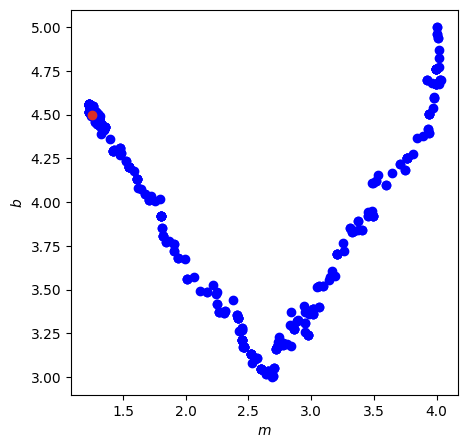

In [9]:
fig,ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(m, b, marker='o', zorder=10, color='#de2d26')

#plt.plot(m, b, marker='^', zorder=10, color='green')
plt.scatter(chain[:700,0],chain[:700,1],c ='b')
plt.xlabel('$m$')
plt.ylabel('$b$')

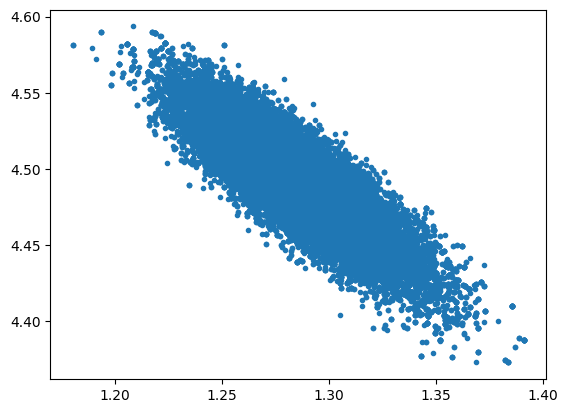

In [10]:
plt.plot(chain[:,0][800:],chain[:,1][800:],'.')

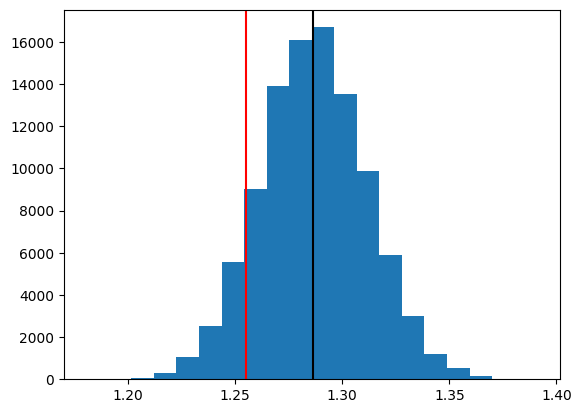

In [11]:
plt.hist(chain[:,0][500:],bins=20)
M_mcmc = np.median(chain[:,0][500:])
plt.axvline(M_mcmc,color='black')
plt.axvline(m,color='red')

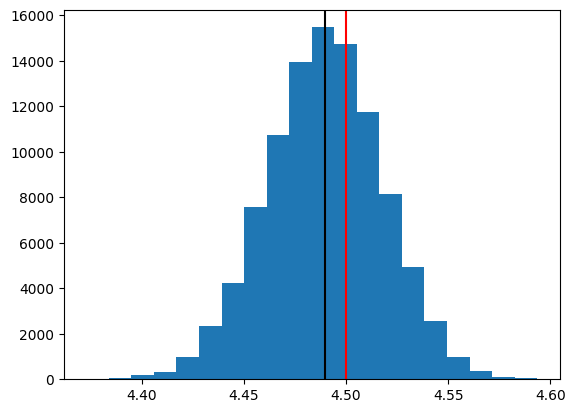

In [12]:
plt.hist(chain[:,1][500:],bins=20)
B_mcmc = np.median(chain[:,1][500:])
plt.axvline(B_mcmc,color='black')
plt.axvline(b,color='red')

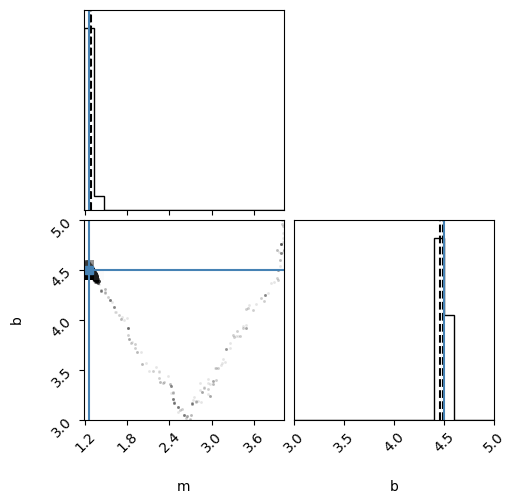

In [13]:
import corner

labels = ["m","b"]
fig = corner.corner(chain,labels=labels,truths=[m,b],quantiles=[0.16,0.5],show_title=True);

Implementacion EMCEE

In [14]:
!pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.4 MB/s eta 0:00:00


In [15]:
import emcee
import scipy.optimize as op
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from pandas import read_table
import numexpr as ne

c=299792.458 #km/s

In [16]:
#col1=zcmb: CMB frame redshift
#col2=zhelio: CMB frame redshift
#col4=mb: B band peak magnitude
#col5=  Error in mb 
#col6=X1:  shape parameter
#col7=dX1: Error in shape parameter
#col8= C: Colour parameter
#col9= dcolour: Error in colour
#col10= log_10 host stellar mass
#col11= Error in log_10 host stellar mass
# col14= cov_m_s: The covariance between mb and x1
#col15= cov_m_c: The covariance between mb and colour
#col16=cov_s_c: The covariance between x1 and colour
data=np.loadtxt("jla_lcparams.txt",usecols=(1,2,4,5,6,7,8,9,10,11,14,15,16)).T


In [17]:
#Read the different components of the covariance matrix
length=740 #first number in the files, also equals to the number of data 
Cov00=read_table('jla_v0_covmatrix.dat').to_numpy().reshape((length, length))
Cov11=read_table('jla_va_covmatrix.dat').to_numpy().reshape((length, length))
Cov22=read_table('jla_vb_covmatrix.dat').to_numpy().reshape((length, length))
Cov01=read_table('jla_v0a_covmatrix.dat').to_numpy().reshape((length, length))
Cov02=read_table('jla_v0b_covmatrix.dat').to_numpy().reshape((length, length))
Cov12=read_table('jla_vab_covmatrix.dat').to_numpy().reshape((length, length))
cov=[Cov00,Cov11,Cov22,Cov01,Cov02,Cov12]

In [18]:
def covmat(alpha,beta,data,cov):
  C00,C11,C22,C01,C02,C12=cov
  dmb,dx1,dcolor,cov_m_s,cov_m_c,cov_s_c=data[3],data[5],data[7],data[10],data[11],data[12]
  cov = ne.evaluate(
            "(C00 + alpha**2*C11 + beta**2*C22"
            "+2.*alpha*C01 -2.*beta*C02 -2.*alpha*beta*C12)")
  
  cov += np.diag(dmb**2 + (alpha*dx1)**2 + (beta*dcolor)**2
                       + 2.*alpha*cov_m_s
                       - 2.*beta*cov_m_c
                       - 2.*alpha*beta*cov_s_c)
  return cov

In [19]:
#Define function to obtain the observed distance modulus. See eq. 4 and 5 from https://arxiv.org/pdf/1401.4064.pdf 
def mu_obs(alpha,beta,MB1,deltaM,data):
  m,X1,C,Mstar=data[2],data[4],data[6],data[8]
  MB=np.zeros(len(Mstar))
  for i in range(len(Mstar)):
    if Mstar[i] < 10:
      MB[i]=MB1
    else:
     MB[i]=MB1+deltaM
  
  tmp=m-(MB-alpha*X1+beta*C)
  return tmp

In [20]:
#Test that the function mu_obs is working

Omega_m_jla,alpha_jla,beta_jla,MB_jla,deltaM_jla=0.295,0.141,3.031,-19.05,-0.07#true parameters
mu_data=mu_obs(alpha_jla,beta_jla,MB_jla,deltaM_jla,data)
cov_data=covmat(alpha_jla,beta_jla,data,cov)


(33.0, 46.0)

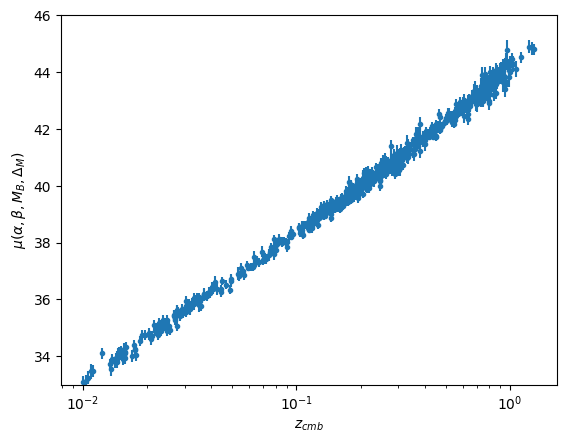

In [21]:
#plt.plot(data[0],mu_data)
plt.errorbar(data[0],mu_data,yerr=np.sqrt(np.diag(cov_data)),fmt='.')
#plt.errorbar(data[0],mu_data,fmt='.')
plt.xlabel(r'$z_{cmb}$')
plt.ylabel(r'$\mu(\alpha,\beta,M_B,\Delta_M)$')
plt.xscale('log')
plt.ylim(33,46)

In [22]:
#definomos la funcion dL para calcular la distancia luminosa utilizando la libreria astropy
def dL(Om,z):
  cosmo = FlatLambdaCDM(H0=70, Om0=Om)
  dl = cosmo.luminosity_distance(z=z)
  return dl

In [23]:
#funcion para el modelo descrito mu para la distancia modulus estandarizada
def mu_model(Omega_m,z):
  tmp = 5*np.log10(dL(Omega_m,z).value/0.00001)
  return tmp

def lnlike(theta,data,cov):
  Om,alpha,beta,MB1,DM = theta
  muobs = mu_obs(alpha,beta,MB1,DM,data)
  z=data[0]
  model = mu_model(Om,z)
  lnlike = -0.5*np.sum((muobs-model)**2/cov)
  return lnlike

def lnprior(theta):
  Om,alpha,beta,MB1,DM = theta
  Ommin,Ommax= 0,1
  alphamin,alphamax= 0.1,0.2
  betamin,betamax = 2.6,3.5
  MB1min,MB1max= -18,-20
  DMmin,DMmax=-0.15,0.05
  if (Ommin<Om<Ommax) and (alphamin<alpha<alphamax) and (betamin<beta<betamax) and (MB1min<MB1<MB1max) and (DMmin<DM<DMmax):
    lnprior = 0.0
  else:
    lnprior = -np.inf
  return lnprior

def lnPost(theta,data,cov):
  lp= lnprior(theta)
  if not np.isfinite(lp):
    return -np.inf 
  return lnlike(theta,data,cov) + lp


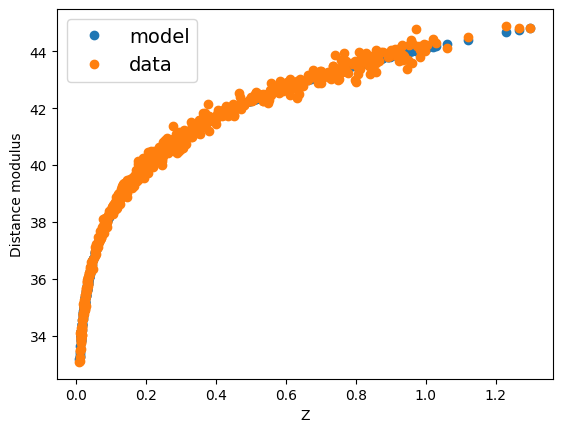

In [24]:
mu_theory = mu_model(Omega_m_jla,data[0])
plt.plot(data[0],mu_theory,'o',label ="model")
plt.plot(data[0],mu_data,'o',label="data")
plt.legend(fontsize=14)
plt.xlabel('Z')
plt.ylabel('Distance modulus')
plt.show()

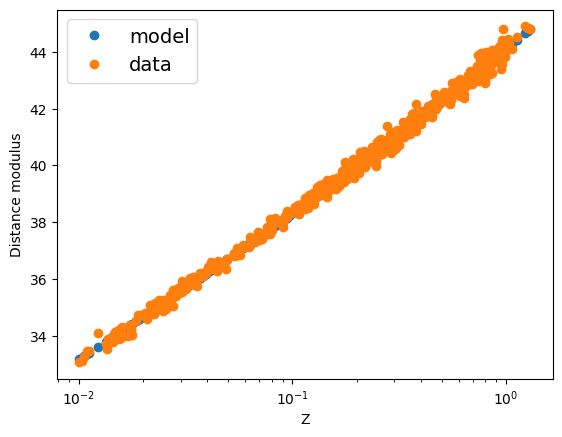

In [25]:
mu_theory = mu_model(Omega_m_jla,data[0])
plt.plot(data[0],mu_theory,'o',label ="model")
plt.plot(data[0],mu_data,'o',label="data")
plt.legend(fontsize=14)
plt.xlabel('Z')
plt.ylabel('Distance modulus')
plt.xscale('log')
plt.show()

In [26]:
from scipy.optimize import minimize

np.random.seed(42)
nll= lambda *args:-lnlike(*args)
initial = np.array([])

In [27]:
Nsteps=100000
sigma_m,sigma_alp,sigma_bet,sigma_Dm,sigma_MB1=0.01,0.01,0.01,0.1,0.001
theta_start=[Omega_m_jla,alpha_jla,beta_jla,MB_jla,deltaM_jla]
theta_accepted=[]
for i in range(Nsteps):
  theta_trial=[np.random.normal(theta_start[0],sigma_m),np.random.normal(theta_start[1],sigma_alp),np.random.normal(theta_start[2],sigma_bet),np.random.normal(theta_start[3],sigma_MB1),np.random.normal(theta_start[4],sigma_Dm)]
  lnPost_start=lnPost(theta_start,data,cov)
  lnPost_trial=lnPost(theta_trial,data,cov)
  p_acc=lnPost_trial-lnPost_start
  if np.exp(p_acc)>1:
    theta_accepted.append(theta_trial)
    theta_start=theta_trial
  elif np.exp(p_acc)>np.random.uniform(0,1):
    theta_accepted.append(theta_trial)
    theta_start=theta_trial
  else:
    theta_accepted.append(theta_start)

In [28]:
theta_accepted=np.asarray(theta_accepted)
theta_accepted

array([[  0.295,   0.141,   3.031, -19.05 ,  -0.07 ],
       [  0.295,   0.141,   3.031, -19.05 ,  -0.07 ],
       [  0.295,   0.141,   3.031, -19.05 ,  -0.07 ],
       ...,
       [  0.295,   0.141,   3.031, -19.05 ,  -0.07 ],
       [  0.295,   0.141,   3.031, -19.05 ,  -0.07 ],
       [  0.295,   0.141,   3.031, -19.05 ,  -0.07 ]])